In [ ]:
import sqlite3
import gradio as gr
import pandas as pd
from PIL import Image
from io import BytesIO
import base64

DB_FILE = "../data/giftcode_system.db"

/root/dev/DeCAP/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from pathlib import Path

Path(__file__).resolve().parents[2] / "data" / "sample.csv"

NameError: name '__file__' is not defined

In [ ]:
import sqlite3

conn = sqlite3.connect(DB_FILE)
conn.execute("ATTACH DATABASE '../data/working_copy.db' AS work")

# Create table structure in working copy (adjust columns as needed)
conn.execute("CREATE TABLE work.captchas AS SELECT * FROM main.captchas")

# Insert only the data you want
conn.execute("INSERT INTO work.captchas SELECT * FROM main.captchas")

conn.commit()
conn.execute("DETACH DATABASE work")
conn.close()


In [19]:
DB_FILE = "../dataset/giftcode_system.db"
def get_giftcodes():
    """Retrieve all gift codes."""
    conn = sqlite3.connect(DB_FILE)
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM captchas")
    rows = cursor.fetchall()
    conn.close()
    return rows

arr = get_giftcodes()

In [ ]:
df = pd.DataFrame(arr, columns=['ID', 'Captcha', 'Image', 'Feedback'])
df = df[df['Feedback'] == 0]

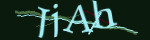

In [ ]:

image = Image.open(BytesIO(df.loc[0, 'Image']))
image


In [44]:
len(df)

903

In [ ]:
corrections_csv = pd.read_csv("corrections.csv")
corrections_csv
index = 0  # Pointer

def get_image_from_bytes(image_data):
    if isinstance(image_data, str):  # base64 string
        try:
            if ',' in image_data:
                image_data = image_data.split(',')[1]
            image_data = base64.b64decode(image_data)
        except Exception as e:
            raise ValueError(f"Base64 decode failed: {e}")
    return Image.open(BytesIO(image_data))

def get_image():
    global index
    row = df.iloc[index]
    return get_image_from_bytes(row['Image'])

def submit_captcha(user_input):
    global index
    # Save logic here: e.g. update df or write to a file/db
    # Example: df.at[index, 'UserInput'] = user_input

    with open("corrections.cache", "a") as f:
        f.write(f"{index},{user_input},{df.loc[index, 'Image']}\n")

    index += 1
    if index >= len(df):
        return None, "✅ Done!"
    
    next_img = get_image()
    return next_img, ""

with gr.Blocks() as demo:
    img = gr.Image(type="pil", value=get_image)
    txt = gr.Textbox(label="Enter captcha")
    out = gr.Textbox(label="Status")

    btn = gr.Button("Submit")
    btn.click(fn=submit_captcha, inputs=txt, outputs=[img, out])

demo.launch()

* Running on local URL:  http://127.0.0.1:7870
* To create a public link, set `share=True` in `launch()`.


In [45]:
corrections_csv = pd.read_csv("corrections.csv")


ParserError: Error tokenizing data. C error: Expected 15 fields in line 3, saw 17
